# Chargement de librairies

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données

In [51]:

games = pd.read_csv('./data/games.csv')
games_details = pd.read_csv('./data/games_details.csv')
players = pd.read_csv('./data/players.csv')
ranking = pd.read_csv('./data/ranking.csv')
teams = pd.read_csv('./data/teams.csv')


/tmp/ipykernel_1471/236934129.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('./data/games_details.csv')


# Aperçu des données des jeux

In [52]:
print(games.head())
print(games.describe())
print('-'*100)
print(games_details.head())
print('-'*100)
print(teams.head())

  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_P

# Aperçu des données des joueurs

In [53]:
print(players.head())

        PLAYER_NAME     TEAM_ID  PLAYER_ID  SEASON
0     Royce O'Neale  1610612762    1626220    2019
1  Bojan Bogdanovic  1610612762     202711    2019
2       Rudy Gobert  1610612762     203497    2019
3  Donovan Mitchell  1610612762    1628378    2019
4       Mike Conley  1610612762     201144    2019


# Exemple de vérification des valeurs manquantes pour les jeux

In [54]:
print(games.isnull().sum())

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64


# Conversion des types de données si nécessaire

In [55]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

# Distribution des points par équipe à domicile et à l'extérieur

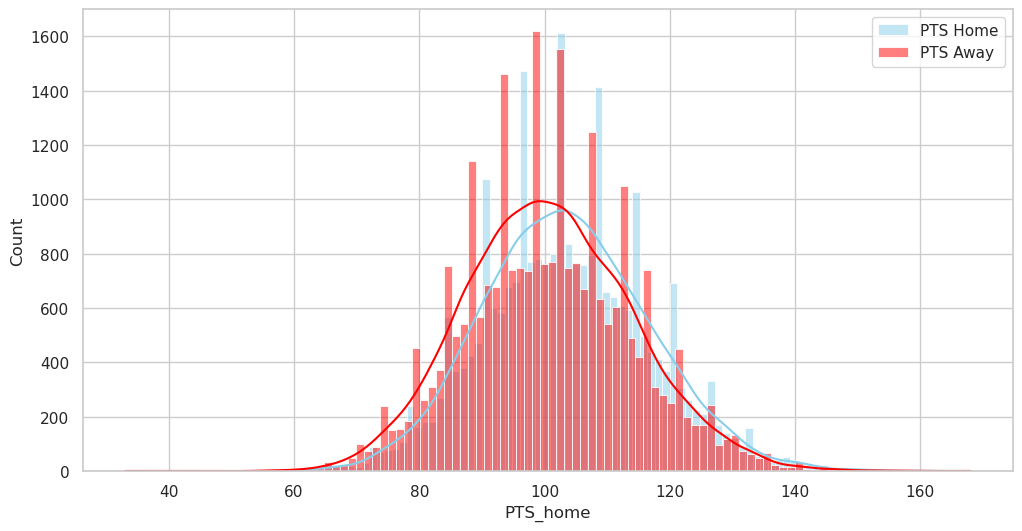

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(games['PTS_home'], color="skyblue", label='PTS Home', kde=True)
sns.histplot(games['PTS_away'], color="red", label='PTS Away', kde=True)
plt.legend()
plt.show()

# Analyse des performances des Équipes

In [ ]:
# Calculer la moyenne des points et des rebonds par équipe
mean_stats_by_team = games_details.groupby('TEAM_ID').agg({'PTS': 'mean', 'REB': 'mean'}).reset_index()
merged_df = mean_stats_by_team.merge(teams, on='TEAM_ID')

# Liste des colonnes à conserver
columns_to_keep = ['TEAM_ID', 'CITY', 'NICKNAME', 'PTS', 'REB']

# Sélectionner uniquement les colonnes désirées
df_filtered = merged_df[columns_to_keep]
df_filtered['PTS_REB_TOTAL'] = df_filtered['PTS'] + df_filtered['REB']
df_filtered['FULL_NAME'] = df_filtered['CITY'] + ' ' + df_filtered['NICKNAME']
df_sorted_by_points = df_filtered.sort_values(by='PTS', ascending=False)
df_sorted_by_rebounds = df_filtered.sort_values(by='REB', ascending=False)
df_sorted_by_points_rebounds = df_filtered.sort_values(by='PTS_REB_TOTAL', ascending=False)



# Visualisation des performances des Équipes

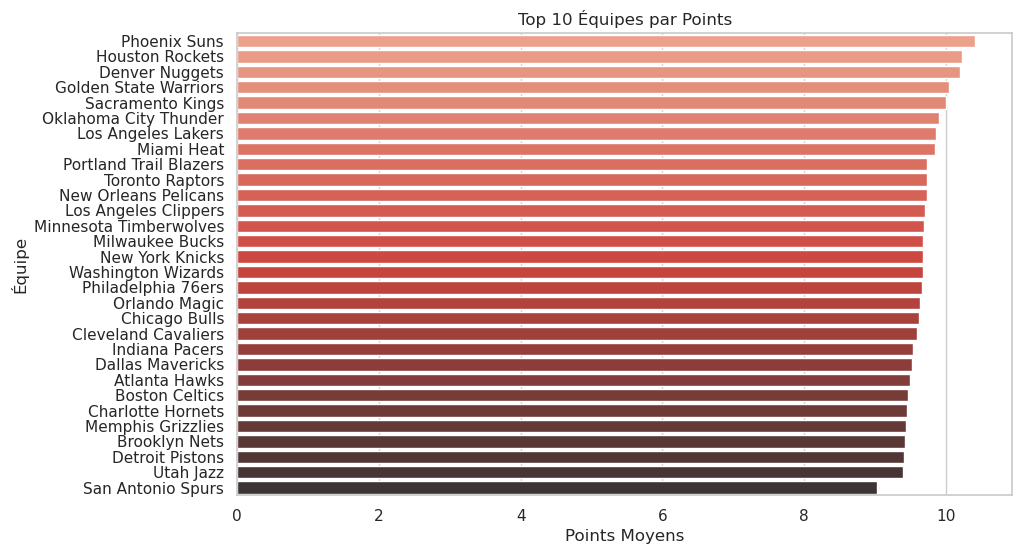

In [58]:
# Réglages pour améliorer l'apparence des graphiques
sns.set_theme(style="whitegrid")

# Création d'un barplot pour les points
plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y='FULL_NAME', hue='FULL_NAME', legend=False, data=df_sorted_by_points, palette='Reds_d')
plt.title('Top 10 Équipes par Points')
plt.xlabel('Points Moyens')
plt.ylabel('Équipe')
plt.show()

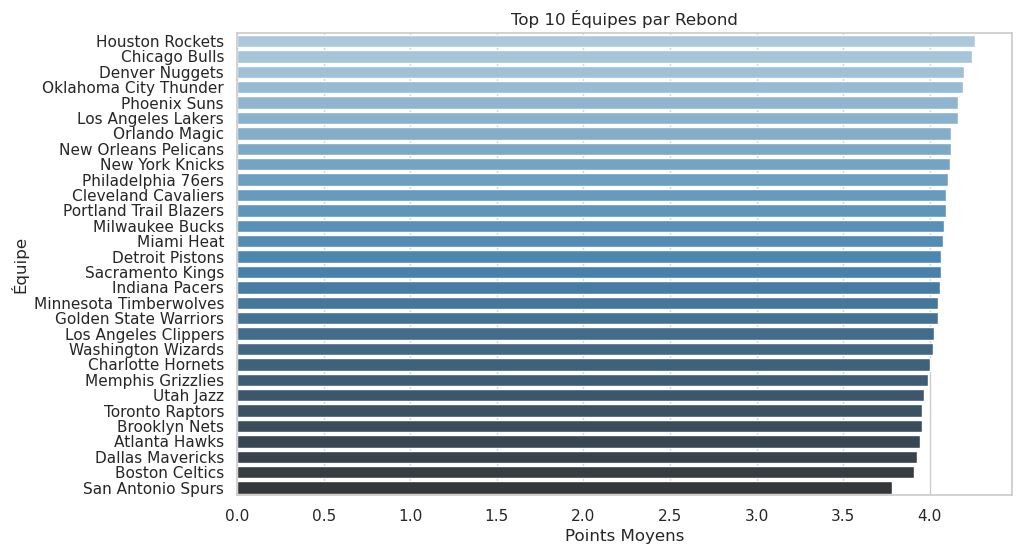

In [59]:
# Réglages pour améliorer l'apparence des graphiques
sns.set_theme(style="whitegrid")

# Création d'un barplot pour les points
plt.figure(figsize=(10, 6))
sns.barplot(x='REB', y='FULL_NAME', hue='FULL_NAME', legend=False, data=df_sorted_by_rebounds, palette='Blues_d')
plt.title('Top 10 Équipes par Rebond')
plt.xlabel('Points Moyens')
plt.ylabel('Équipe')
plt.show()

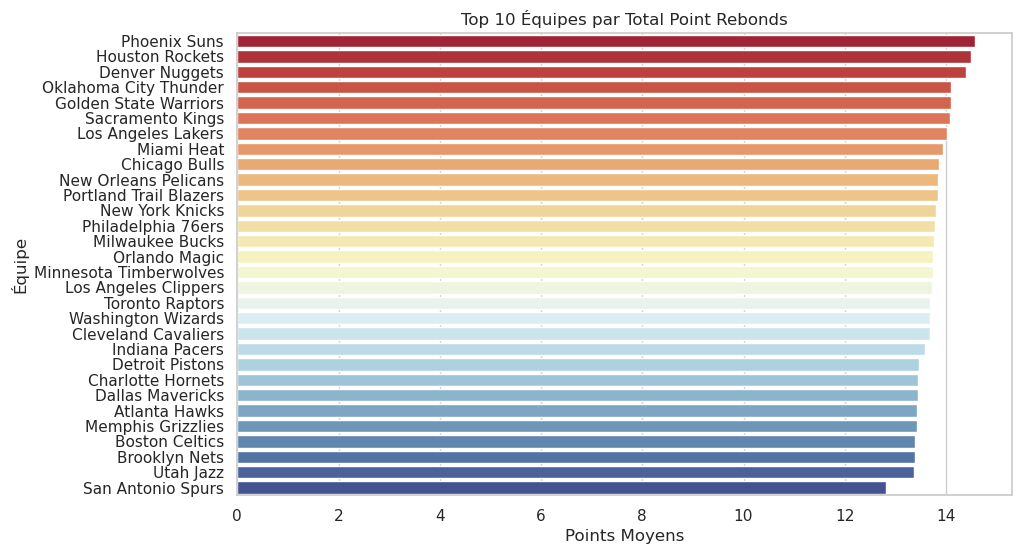

In [60]:
# Réglages pour améliorer l'apparence des graphiques
sns.set_theme(style="whitegrid")

# Création d'un barplot pour les points
plt.figure(figsize=(10, 6))
sns.barplot(x='PTS_REB_TOTAL',y='FULL_NAME', hue='FULL_NAME', legend=False, data=df_sorted_by_points_rebounds, palette='RdYlBu')
plt.title('Top 10 Équipes par Total Point Rebonds')
plt.xlabel('Points Moyens')
plt.ylabel('Équipe')
plt.show()

# Visualisation de la performance des joueurs

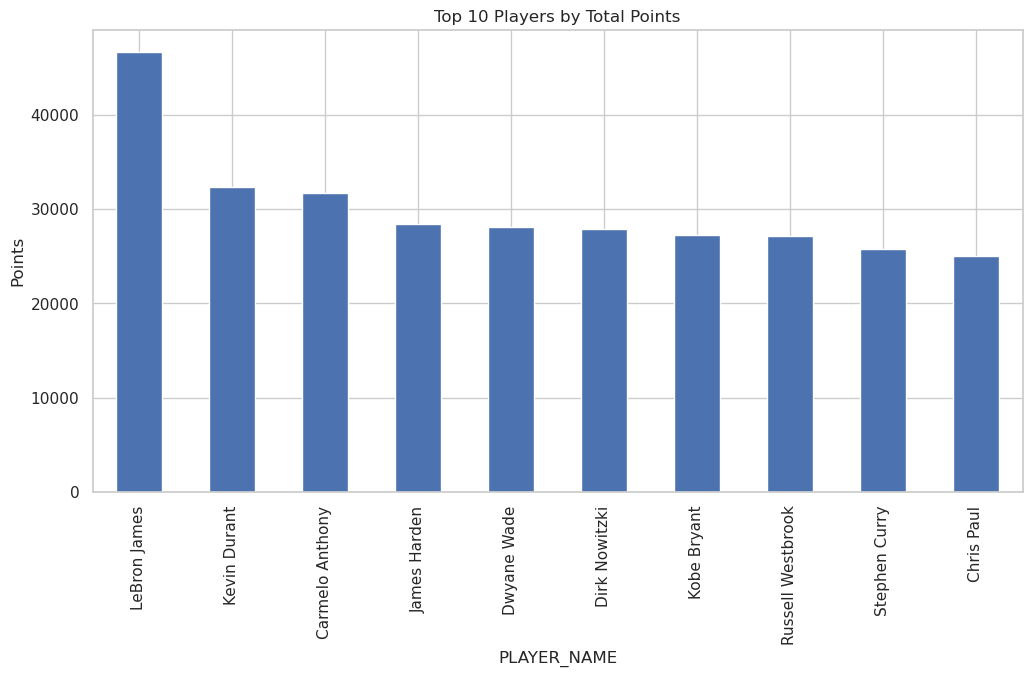

In [62]:
plt.figure(figsize=(12, 6))
top_scorers = games_details.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).head(10)
top_scorers.plot(kind='bar')
plt.title('Top 10 Players by Total Points')
plt.ylabel('Points')
plt.show()